In [4]:
#import necessary libraries

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib widget


In [5]:
#tell python where the data is located, based on the current folder
filePath = "..//..//data//"
# tell what is the file name we will open and load data
fileName = "output2022-04-27T15_16_04.csv"



In [6]:
#load data into "data" variable
data = pd.read_csv(filePath+fileName)
#display data
data

,topLeft.Item1.width,topLeft.Item1.height,topLeft.Item1.avgBright,topLeft.Item1.X,topLeft.Item1.Y,topLeft.Item2.width,topLeft.Item2.height,topLeft.Item2.avgBright,topLeft.Item2.X,topLeft.Item2.Y,...,bottomRight.Item5.width,bottomRight.Item5.height,bottomRight.Item5.avgBright,bottomRight.Item5.X,bottomRight.Item5.Y,bottomRight.Item6.width,bottomRight.Item6.height,bottomRight.Item6.avgBright,bottomRight.Item6.X,bottomRight.Item6.Y
0,21,56,68.434524,0,0,20,54,64.022222,0,0,...,233,233,19.067104,0,0,233,233,19.067104,0,0
1,20,56,71.432143,0,0,20,54,64.350000,0,0,...,233,233,19.053160,0,0,233,233,19.053160,0,0
2,20,56,71.283036,0,0,20,54,63.817593,0,0,...,233,233,19.059017,0,0,233,233,19.059017,0,0
3,21,56,68.580782,0,0,20,55,62.601818,0,0,...,233,233,18.992374,0,0,233,233,18.992374,0,0
4,20,56,71.359821,0,0,20,54,64.083333,0,0,...,233,233,19.026359,0,0,233,233,19.026359,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92302,38,57,70.473684,0,0,115,51,14.654390,0,0,...,233,233,11.038479,0,0,233,233,11.038479,0,0
92303,39,56,70.054029,0,0,115,51,14.595908,0,0,...,233,233,11.131647,0,0,233,233,11.131647,0,0
92304,40,57,67.816667,0,0,115,51,14.888491,0,0,...,233,233,11.156698,0,0,233,233,11.156698,0,0
92305,39,56,70.641026,0,0,115,51,14.771185,0,0,...,233,233,11.049071,0,0,233,233,11.049071,0,0


In [7]:
#show the names of each column
# from this we learn that the data is organised pairwise, that is every two columns come from a specific ROI,
# with the first column being the average brightness of a ROI and the second the running average of the same ROI
#print(data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92307 entries, 0 to 92306
Columns: 120 entries, topLeft.Item1.width to bottomRight.Item6.Y
dtypes: float64(24), int64(96)
memory usage: 84.5 MB


In [31]:
brightness = list()
xValues = list()
yValues = list()
width = list()
height = list()
for item in data.keys():
    if "avgBright" in item:
        brightness.append(item)
    if "X" in item:
        xValues.append(item)
    if "Y" in item:
        yValues.append(item)
    if "width" in item:
        width.append(item)
    if "height" in item:
        height.append(item)

#brightData = data[brightness]

In [98]:
#use the change rate of height as an indicator of hatching. 
# grab those indexes to be used later for cutting traces
threshold = 5
hatchIndex = list()
for item in height:
    dummie = data[item].diff()
    hatchIndex.append(dummie.where(dummie>=threshold).first_valid_index()) 
print(hatchIndex)

[23175, 47085, 40587, 36795, 26243, 22466, 27236, 34284, 54302, 26493, 22533, 35326, 33166, 9814, 2635, 44685, 38070, 46835, None, None, None, None, None, None]


In [101]:

#calculate rolling average for each ROI and subtract that from brightness value
roll = 60
rolling = data[brightness].rolling(window=roll).mean()
subtracted = data[brightness]-rolling

#make all values positive by squaring all values than getting the square root
module = np.sqrt(subtracted**2)

#plt.hist(module[module.columns[0]],bins=50)

### TODO:

- finding hatching point towards the end.
    - (now done manually) all embryos are checked for hatching time point. There is also a check to see if hatched embryos did not swim over the other ones. 

- threshold each trace (value determined by eye) and all values above threshold are considered movement and summed. 
- calculate at which frame the first point above threshold happened (movement onset)
- average of values above threshold (average movement magnitude)
- duration between movement onset and hatching (as frames or hours/minutes).
- percentage of time moving (number of frames above threshold/ total frames)
- average bout length (at some point there are burst of movement intersped with no movement)
- between movement onset and hatching, divide trace into 40/60 periods and then calculate same as above.
- bin trace into 30min periods and do fft on each bin. compare differences between them.

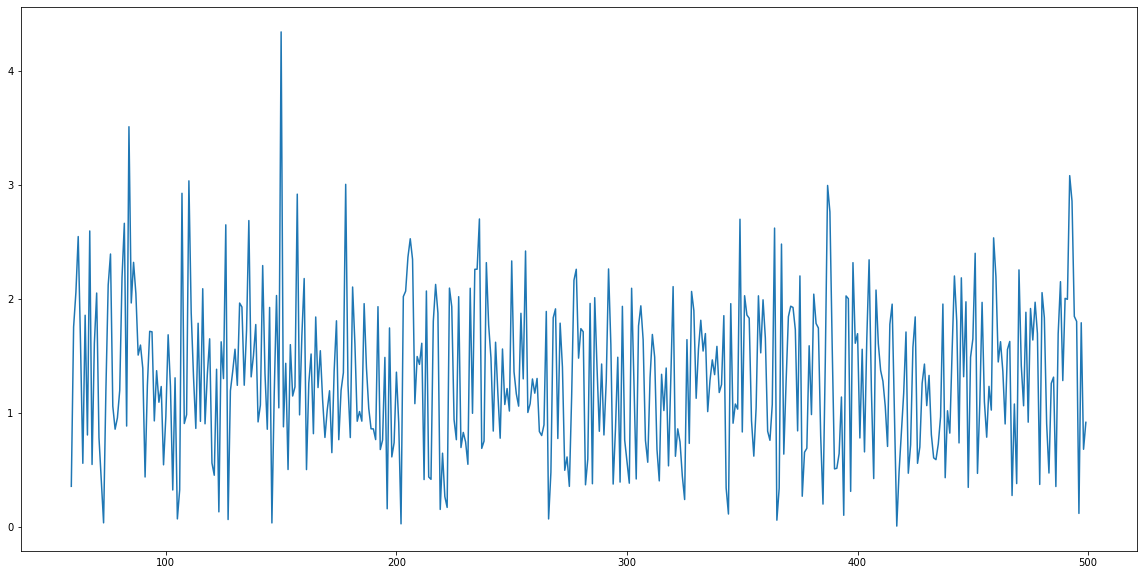

In [111]:
fig = plt.figure(figsize=[20,10])
plt.plot(module[brightness[0]][0:500])

#need a sample of what movement onset looks like

In [14]:
brightData

,topLeft.Item1.avgBright,topLeft.Item2.avgBright,topLeft.Item3.avgBright,topLeft.Item4.avgBright,topLeft.Item5.avgBright,topLeft.Item6.avgBright,topRight.Item1.avgBright,topRight.Item2.avgBright,topRight.Item3.avgBright,topRight.Item4.avgBright,...,bottomLeft.Item3.avgBright,bottomLeft.Item4.avgBright,bottomLeft.Item5.avgBright,bottomLeft.Item6.avgBright,bottomRight.Item1.avgBright,bottomRight.Item2.avgBright,bottomRight.Item3.avgBright,bottomRight.Item4.avgBright,bottomRight.Item5.avgBright,bottomRight.Item6.avgBright
0,68.434524,64.022222,60.082846,66.086851,67.176296,77.750000,62.059414,71.080420,63.315592,75.753247,...,76.373214,75.672840,76.445617,65.690769,19.067104,19.067104,19.067104,19.067104,19.067104,19.067104
1,71.432143,64.350000,58.794258,68.460034,65.604499,77.057630,60.475556,69.715266,65.124224,75.709957,...,77.061607,74.568182,79.463435,66.866667,19.053160,19.053160,19.053160,19.053160,19.053160,19.053160
2,71.283036,63.817593,59.267943,68.330782,67.010370,76.440747,60.205926,73.606227,63.504498,75.991342,...,77.793636,74.404545,75.133971,66.726275,19.059017,19.059017,19.059017,19.059017,19.059017,19.059017
3,68.580782,62.601818,58.819139,68.689626,67.207547,78.244628,60.074074,69.276158,66.653907,71.939123,...,76.549091,76.222484,79.448980,62.744822,18.992374,18.992374,18.992374,18.992374,18.992374,18.992374
4,71.359821,64.083333,56.279091,68.125850,67.664906,77.050325,70.541084,59.014545,67.892045,70.283794,...,77.353636,76.164352,78.385129,66.083922,19.026359,19.026359,19.026359,19.026359,19.026359,19.026359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92302,70.473684,14.654390,57.036767,12.329810,10.091773,9.616438,8.386752,8.253307,8.235439,8.259986,...,104.101496,38.880745,39.791560,39.300505,11.038479,11.038479,11.038479,11.038479,11.038479,11.038479
92303,70.054029,14.595908,57.111030,12.468499,10.282761,9.734145,8.158120,8.000000,7.983593,8.099518,...,101.965934,39.027950,39.964194,39.460227,11.131647,11.131647,11.131647,11.131647,11.131647,11.131647
92304,67.816667,14.888491,57.369130,12.088795,9.963208,9.433283,8.311966,8.077381,8.070550,8.263430,...,96.825275,38.734783,39.663043,39.188763,11.156698,11.156698,11.156698,11.156698,11.156698,11.156698
92305,70.641026,14.771185,57.607936,12.493446,10.207937,9.730086,8.416667,8.277778,8.318294,8.312328,...,96.375824,39.183230,40.131074,39.648359,11.049071,11.049071,11.049071,11.049071,11.049071,11.049071


In [ ]:
start = 90000
end = -1
fig = plt.figure(figsize=[25,20])
sub1=plt.subplot(3,1,1)
plt.plot(data["topLeft.Item1.avgBright"][start:end])
plt.plot(rolling["topLeft.Item1.avgBright"][start:end])
sub2=plt.subplot(3,1,2)
plt.plot(data["topLeft.Item1.width"][start:end])
plt.plot(rolling["topLeft.Item1.width"][start:end])
sub3=plt.subplot(3,1,3)
plt.plot(data["topLeft.Item1.height"][start:end])
plt.plot(rolling["topLeft.Item1.height"][start:end])

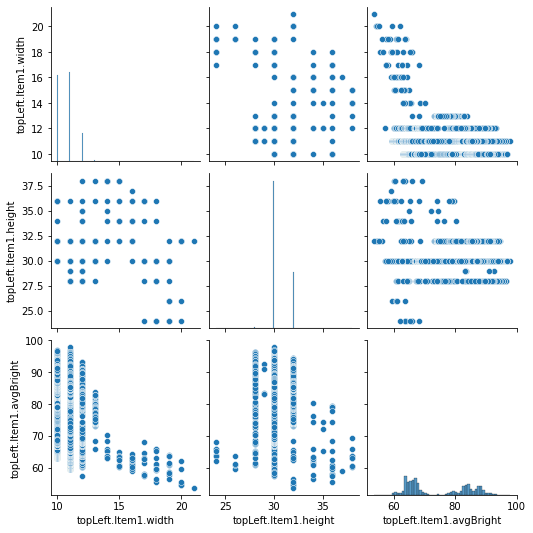

In [9]:
sns.pairplot(data.iloc[:,0:3])

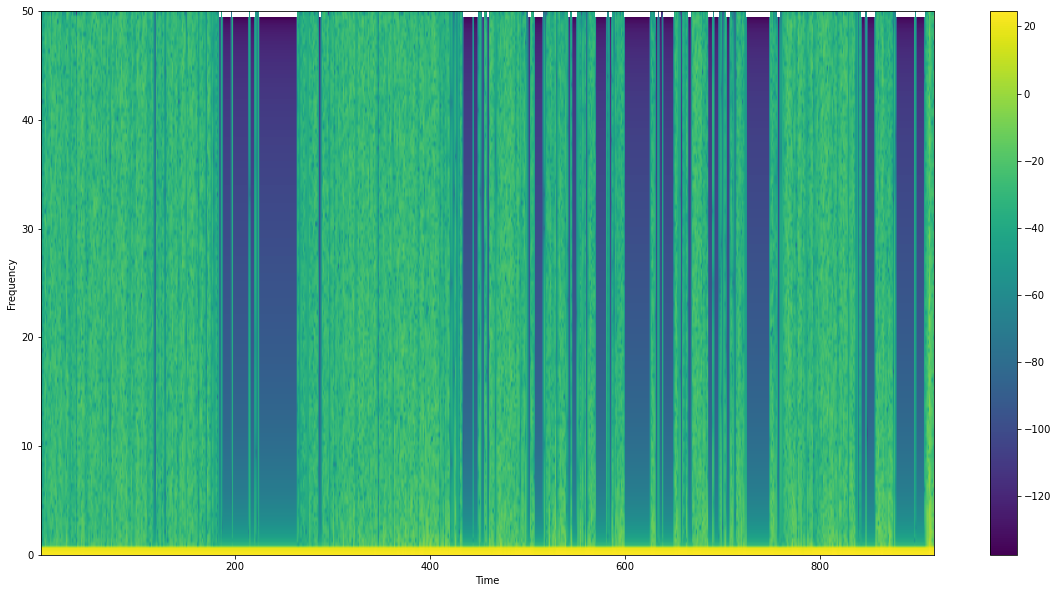

In [43]:
#plt.plot(detrended.ROI1[0:3000])
fig = plt.figure(figsize=[20,10])
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(data["topLeft.Item1.width"], Fs=100)
plt.xlabel('Time')
plt.ylabel('Frequency')
fig.colorbar(imageAxis)

6.370833333333334